In [1]:
import google


In [2]:
from google.protobuf import text_format
from ffn.inference import inference
from ffn.inference import inference_pb2

In [5]:
import os
os.getcwd()

'C:\\Users\\binxu\\PycharmProjects\\FloodFillNetwork-Notes'

In [6]:
os.chdir('D://ixQ_IPL/')

In [3]:
config = '''image {
  hdf5: "D://ixQ_IPL/grayscale_ixQ_IPL_align_norm.h5::raw"
}
image_mean: 128
image_stddev: 33
checkpoint_interval: 1800
seed_policy: "PolicyPeaks"
model_checkpoint_path: "D:\FFN-models\LR_model_Longtime_SF_Deep_Retina_Trans\model.ckpt-30802217"
model_name: "convstack_3d.ConvStack3DFFNModel"
model_args: "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 17], \\"deltas\\": [8, 8, 4]}"
segmentation_output_dir: "results/tmp"
inference_options {
  init_activation: 0.95
  pad_value: 0.05
  move_threshold: 0.9
  min_boundary_dist { x: 1 y: 1 z: 1}
  segment_threshold: 0.6
  min_segment_size: 1000
}'''
req = inference_pb2.InferenceRequest()
_ = text_format.Parse(config, req)

In [5]:
runner = inference.Runner()
runner.start(req)
canvas, alignment = runner.make_canvas((0, 500, 500), (78, 1000, 1000))

INFO:tensorflow:Restoring parameters from D:\FFN-models\LR_model_Longtime_SF_Deep_Retina_Trans\model.ckpt-30802217


INFO:tensorflow:Restoring parameters from D:\FFN-models\LR_model_Longtime_SF_Deep_Retina_Trans\model.ckpt-30802217


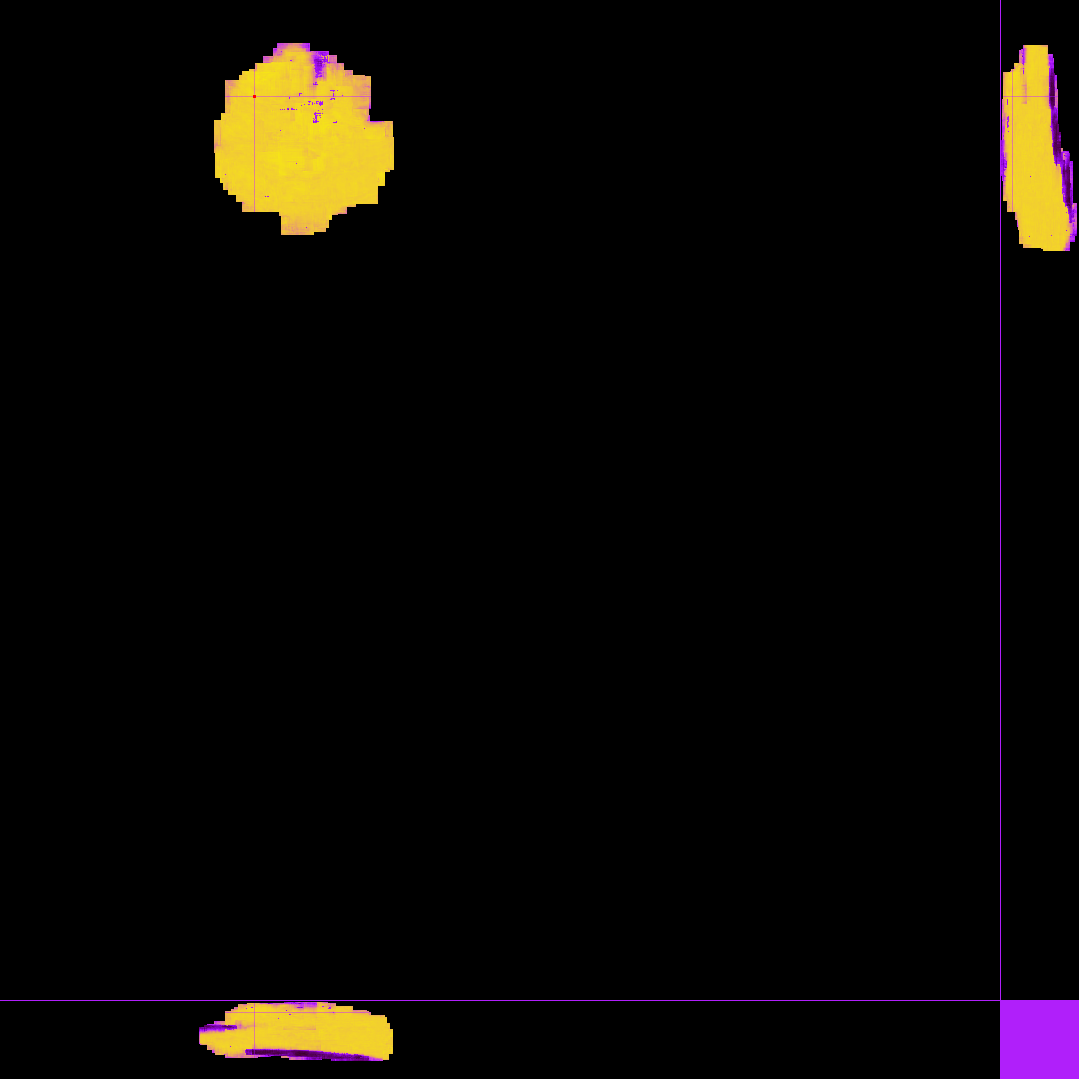

NotFoundError: Failed to create a directory: results/tmp\500\500; No such file or directory

In [6]:
# Create a single segment, starting from the specified origin point.
canvas.segment_at((45, 150, 300),  # zyx
                  dynamic_image=inference.DynamicImage(),
                  vis_update_every=1)#(45, 150, 300)